In [1]:
import pandas as pd
from tabulate import tabulate
from typing import Tuple, List

import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
df = pd.read_csv("data/Usuariosyconsumodeelectricidadpormunicipio_clean.csv", dtype={
    'Cve_Edo': 'string',
    'Cve_Inegi': 'string',
    'Cve_Mun': 'string',
    'Estado': 'string',
    'Municipio': 'string',
    'Tarifa': 'string',
    'Periodo': 'int64',
    'Usuarios': 'int64',
    'Consumo': 'float64',
    'ISO': 'string'
})
df.head()

,Cve_Edo,Cve_Inegi,Cve_Mun,Estado,Municipio,Tarifa,Periodo,Usuarios,Consumo,ISO
0,1,01,001,Aguascalientes,Aguascalientes,01,2010,231727,281228528.0,MX-AGU
1,1,01,001,Aguascalientes,Aguascalientes,1A,2010,0,0.0,MX-AGU
2,1,01,001,Aguascalientes,Aguascalientes,1B,2010,0,0.0,MX-AGU
3,1,01,001,Aguascalientes,Aguascalientes,1C,2010,0,0.0,MX-AGU
4,1,01,001,Aguascalientes,Aguascalientes,1D,2010,0,0.0,MX-AGU


In [3]:
consumo_por_estado = df[["Estado", "Municipio", "Tarifa", "Periodo", "Usuarios", "Consumo", "ISO"]]\
.loc[(df["Estado"] != "Nacional") & (df["Municipio"] == "Total Estatal") & (df["Tarifa"] == "TOTAL")]
consumo_por_estado.head()

,Estado,Municipio,Tarifa,Periodo,Usuarios,Consumo,ISO
539,Aguascalientes,Total Estatal,TOTAL,2010,389524,2.206411e+09,MX-AGU
809,Baja California,Total Estatal,TOTAL,2010,1072742,8.948924e+09,MX-BCN
1079,Baja California Sur,Total Estatal,TOTAL,2010,231817,1.806438e+09,MX-BCS
1619,Campeche,Total Estatal,TOTAL,2010,244989,1.094650e+09,MX-CAM
3374,Coahuila de Zaragoza,Total Estatal,TOTAL,2010,860434,9.244792e+09,MX-COA


In [4]:
def analysis(file_name:str)->None:
    df_complete = consumo_por_estado[["Estado", "Periodo", "Consumo"]]
    # print_tabulate(df_complete[["dependencia","Tipo"]].drop_duplicates().head(150))
    df_by_dep = df_complete.groupby(["Estado", "Periodo"])[["Consumo"]].aggregate(pd.DataFrame.sum)
    df_by_type = df_complete.groupby(["Estado", "Periodo"])[["Consumo"]].aggregate(pd.DataFrame.sum)# .count()

    # df_by_dep_by_anio = df_by_dep.groupby(["dependencia","anio"]).aggregate(pd.DataFrame.sum).sort_values(by=["dependencia", "anio"], ascending=True)
    df_by_dep.reset_index(inplace=True)
    df_by_dep.set_index("Periodo", inplace=True)
    # print_tabulate(df_by_dep.head(5))

    # for dep in set(df_by_dep["dependencia"]):
    #    plot_by_dep(df_by_dep, dep)
    # df_aux = df_complete.groupby(["Fecha","dependencia"])[['Sueldo Neto']].mean().unstack()
    # df_aux.plot(y = 'Sueldo Neto', legend=False, figsize=(32,18))
    # plt.xticks(rotation=90)
    # plt.savefig("img/foo.png")
    # plt.close()

    df_by_type.boxplot(by = 'Estado', figsize=(18,9))
    plt.xticks(rotation=90)
    plt.savefig("images/boxplot_tipo.png")
    plt.show()
    plt.close()

    # aux = df_complete.groupby(["Tipo"])[["Sueldo Neto"]].aggregate(pd.DataFrame.sum)
    # aux.reset_index(inplace=True)
    df_by_type.reset_index(inplace=True)
    df_aux = df_by_type.rename(columns={"Consumo": "Consumo"}).drop(['Periodo'], axis=1)
    print(df_aux.head())

    # shaphiro-wills
    # Levenes or barletts
    modl = ols("Consumo ~ Estado", data=df_aux).fit()
    anova_df = sm.stats.anova_lm(modl, typ=2)
    if anova_df["PR(>F)"][0] < 0.005:
        print("hay diferencias")
        print(anova_df)
        # Prueba tukey
        # imprimir los resultados
    else:
        print("No hay diferencias")

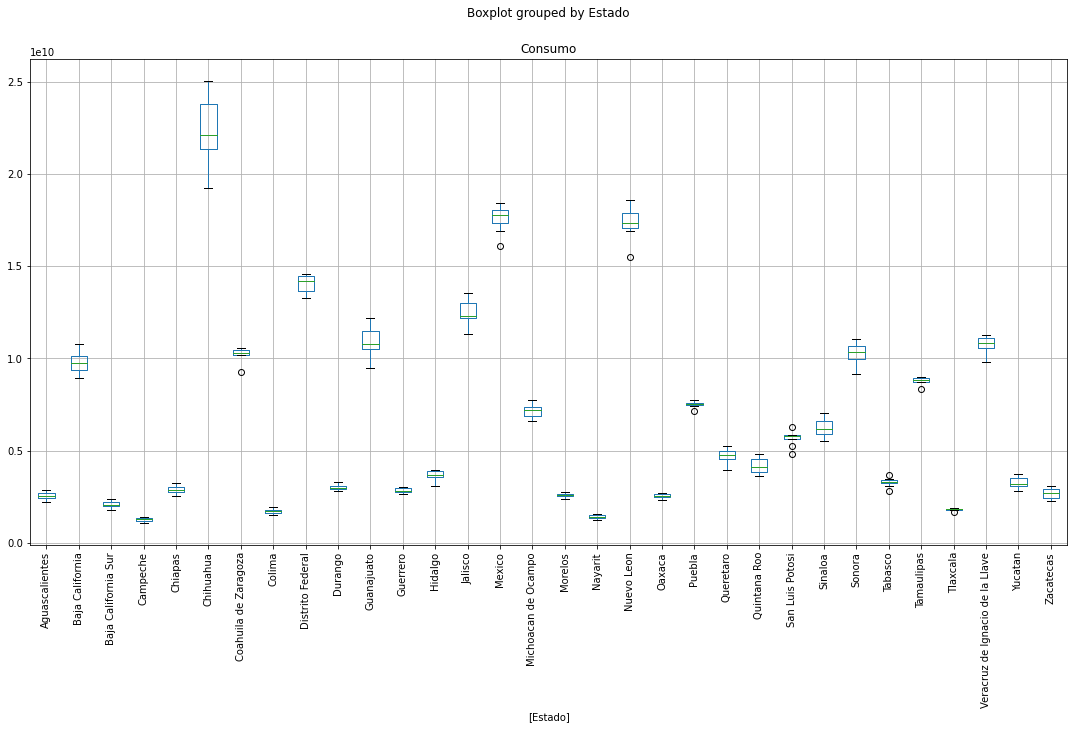

           Estado       Consumo
0  Aguascalientes  2.206411e+09
1  Aguascalientes  2.420160e+09
2  Aguascalientes  2.468459e+09
3  Aguascalientes  2.428524e+09
4  Aguascalientes  2.628558e+09
hay diferencias
                sum_sq     df          F         PR(>F)
Estado    7.360825e+21   31.0  798.05334  1.902551e-211
Residual  6.664705e+19  224.0        NaN            NaN


In [5]:
analysis("data/Usuariosyconsumodeelectricidadpormunicipio_clean.csv")